In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ecom = pd.read_csv('Ecommerce Customers.csv')       #loading the data

In [3]:
ecom.head()           #head() is used to display the first five rows in data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecom.shape           #displays the total number of rows and columns

(500, 8)

In [5]:
ecom.info()          #this gives the number of rows,data identification and datatype of every column in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
ecom.describe()         #this gives some pre-defined functions and is displayed in a frame

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
ecom['Time on App'].corr(ecom['Yearly Amount Spent'])

0.4993277700534505

In [8]:
ecom['Time on Website'].corr(ecom['Yearly Amount Spent'])

-0.002640844672158973

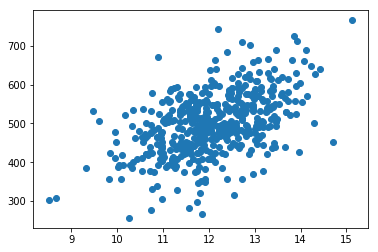

In [9]:
plt.scatter(ecom['Time on App'],ecom['Yearly Amount Spent'])

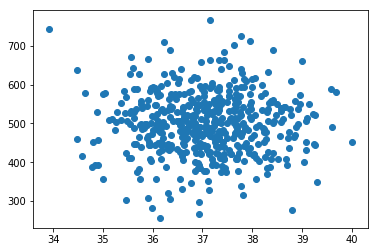

In [10]:
plt.scatter(ecom['Time on Website'],ecom['Yearly Amount Spent'])

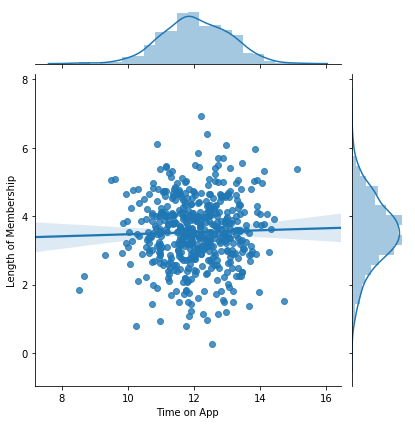

In [13]:
sns.jointplot(x='Time on App',y='Length of Membership',data=ecom,kind='reg')
plt.show()

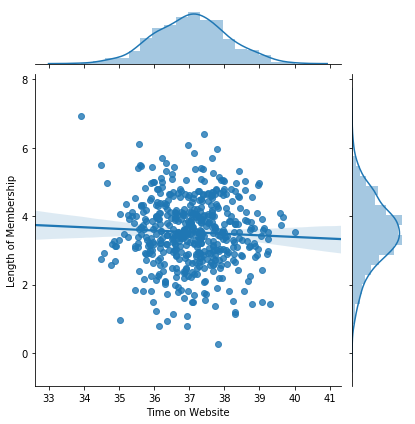

In [14]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=ecom,kind='reg')
plt.show()

In [11]:
ecom.columns         #displaying the column names in the data

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

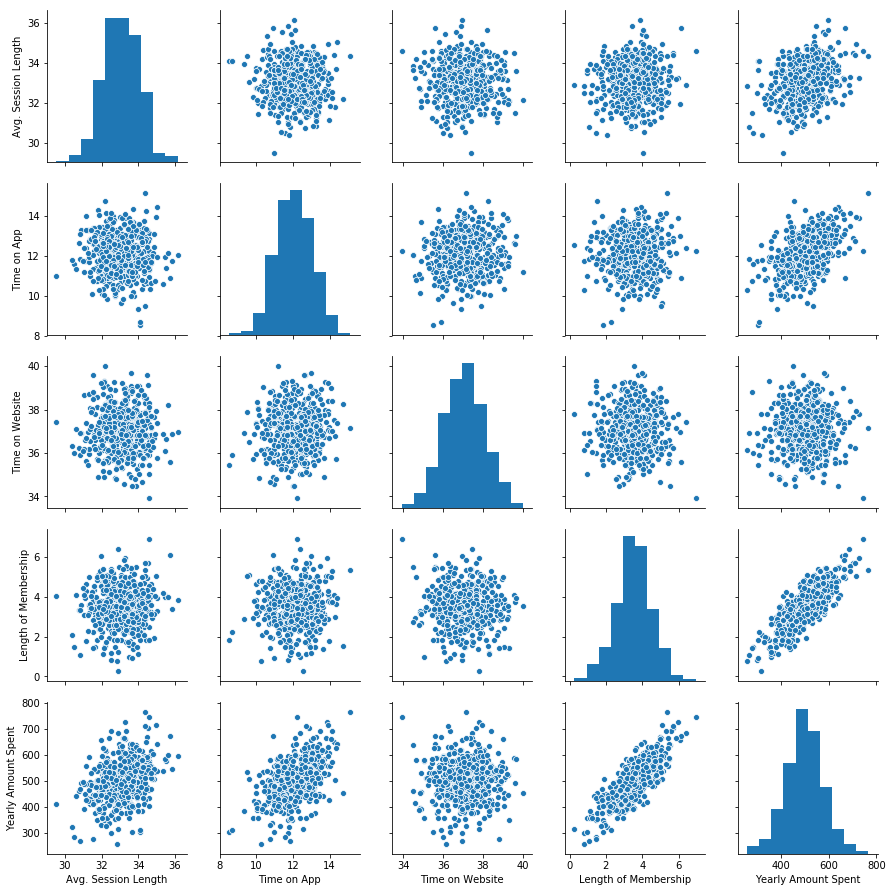

In [12]:
sns.pairplot(ecom)      #pairplot is used to establish the relations among the data

Modelling using Linear Regression:

In [6]:
X = ecom[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = ecom['Yearly Amount Spent']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
269,34.318927,13.402332,37.292045,3.606087
181,34.142863,13.177775,38.856042,3.230974
444,31.268104,12.132509,35.456798,3.072076
287,33.908565,12.914847,39.068864,1.482360
60,33.879784,12.495592,38.052610,4.639320
231,34.173752,12.144749,37.258031,3.397363
218,32.530829,12.354607,37.122345,2.307552
325,33.785207,13.039511,36.312727,2.018195
134,33.540977,11.851891,37.424548,1.767731
341,34.461515,11.917116,37.766687,4.350888


In [13]:
y_train

269    585.931844
181    557.529274
444    423.470533
287    432.472061
60     616.851523
231    512.552534
218    420.916159
325    447.187644
134    407.804031
341    592.688453
372    385.152338
304    494.687156
102    420.737673
268    479.172851
308    604.841319
365    594.274483
209    468.668466
363    527.782996
410    608.271817
29     554.722084
417    438.417742
387    458.781132
158    512.825358
210    496.554082
240    398.163469
171    439.891280
336    478.600916
33     491.073224
472    469.383146
74     578.241605
          ...    
59     547.365141
473    444.545550
413    493.181261
371    447.369027
136    529.230090
111    492.945053
339    476.139247
49     416.358354
490    510.401388
477    487.555458
396    669.987141
5      637.102448
110    459.285124
192    505.119638
220    519.372977
316    466.421199
245    409.070472
424    491.911505
495    573.847438
132    452.627255
40     532.751788
461    502.771075
393    482.830986
75     478.719357
87     473

In [15]:
# regression coefficients 
print( 'coefficients: \n',lm.coef_) 
# variance score: 1 means perfect prediction 
print('variance: \n',lm.score(X_test, y_test))
# plot for residual error 
## setting plot style 

coefficients: 
 [25.69154034 37.89259967  0.56058148 61.64859401]
variance: 
 0.9855061239918993


In [17]:
# print the intercept
print('intercept: \n',lm.intercept_)

intercept: 
 -1045.1152164662387


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [19]:
predictions = lm.predict(X_test)

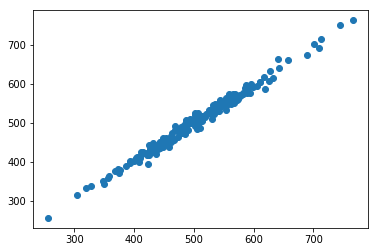

In [20]:
plt.scatter(y_test,predictions)    #actual

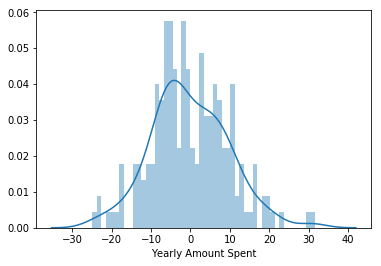

In [26]:
sns.distplot((y_test-predictions),bins=50);

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.742671285838744
MSE: 93.83297800820097
RMSE: 9.686742383701601


In [32]:
lm = LinearRegression()
lm.fit(X_test, y_test)

# make a prediction for an example of an out-of-sample observation
lm.predict([[31.268104,12.132509,35.456798,3.072076]])

array([427.55063638])